In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
#from tensorflow.keras import backend as K
from PIL import Image

In [2]:
image = np.asarray(load_img('../input/frames-imgmsk-me/frames_masks_me/frames/108.jpg',target_size = (256,256,3)), dtype = 'uint8')
mask = img_to_array(load_img('../input/frames-imgmsk-me/frames_masks_me/frame_masks/108.jpeg',
                             target_size = (256,256,1), color_mode="grayscale" )).reshape((256,256)).astype('uint8')

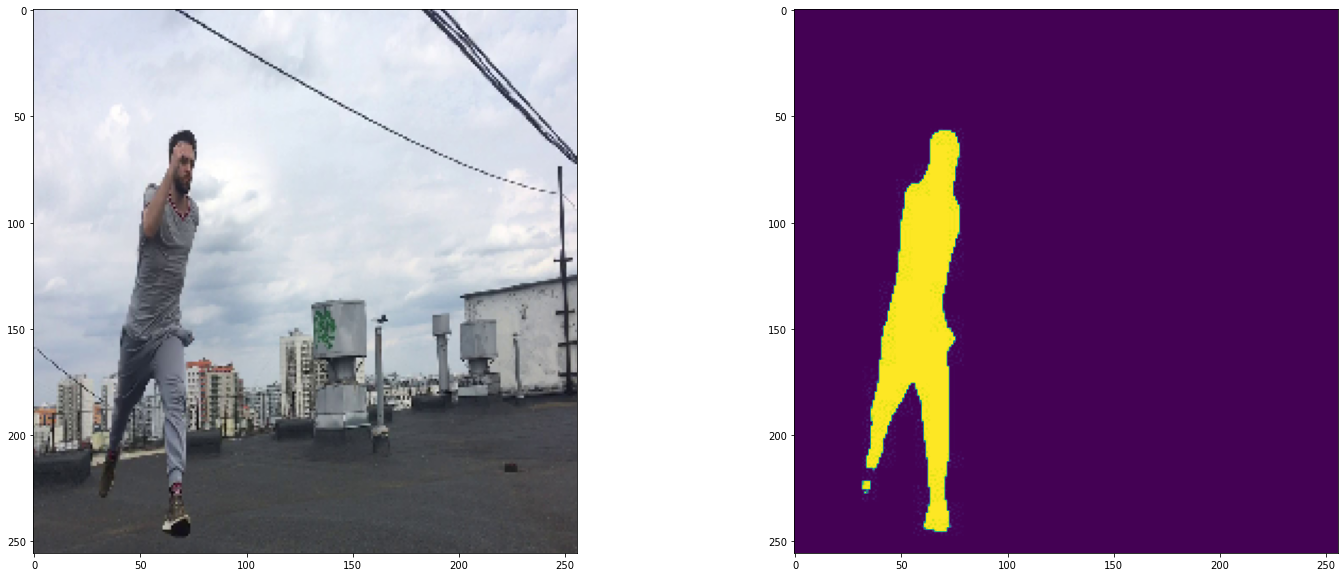

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.imshow(array_to_img(image))
plt.subplot(1,2,2)
plt.imshow(array_to_img(mask.reshape((256,256,1))))

In [4]:
_, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

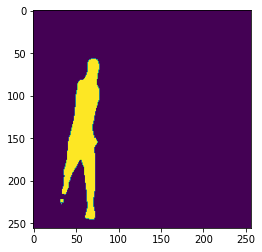

In [5]:
plt.imshow(array_to_img(binary_mask.reshape((256,256,1))))

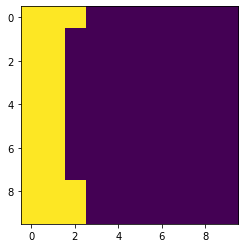

In [6]:
plt.imshow(array_to_img(binary_mask.reshape((256,256,1))[160:170,70:80]))

In [7]:
binary_mask.reshape((256,256,1))[160:170,70:80]

array([[[255],
        [255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[255],
        [255],
        [  0],
        [  0],
        [  0],
        [  0]

In [8]:
new_arr = np.where(binary_mask.reshape((256,256,1))>0,image,255)

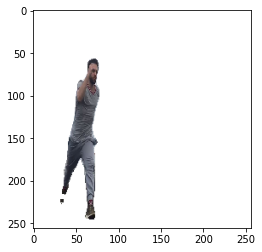

In [9]:
plt.imshow(array_to_img(new_arr))

In [10]:
msk_3_chan_arr = np.zeros((256,256,3),dtype = np.uint8)
msk_3_chan_arr[:,:,0] = mask
msk_3_chan_arr[:,:,1] = mask
msk_3_chan_arr[:,:,2] = mask

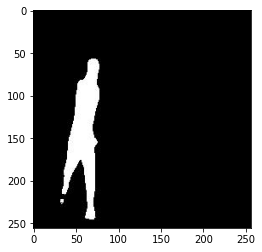

In [11]:
plt.imshow(array_to_img(msk_3_chan_arr))

In [12]:
msk_3_chan_arr.shape

(256, 256, 3)

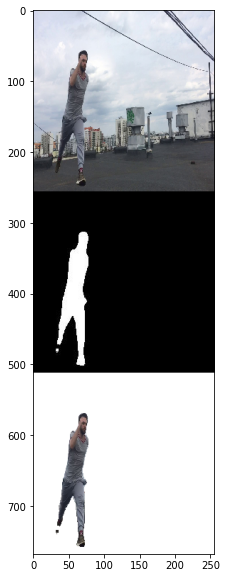

In [13]:
img_msk_concat = np.concatenate((image,msk_3_chan_arr))
all_concat = np.concatenate((img_msk_concat,new_arr))
plt.figure(figsize=(25,10))
plt.imshow(array_to_img(all_concat))

In [14]:
os.mkdir('./collages')
for index in range(0,len(os.listdir('../input/frames-imgmsk-me/frames_masks_me/frames'))-1):
    image = np.asarray(load_img('../input/frames-imgmsk-me/frames_masks_me/frames/{}.jpg'.format(str(index)),target_size = (256,256,3)), dtype = 'uint8')
    mask = img_to_array(load_img('../input/frames-imgmsk-me/frames_masks_me/frame_masks/{}.jpeg'.format(str(index)),
                        target_size = (256,256,1), color_mode="grayscale" )).reshape((256,256)).astype('uint8')
    
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    
    white_background = np.where(binary_mask.reshape((256,256,1))>0,image,255)
    
    msk_3_chan_arr = np.zeros((256,256,3),dtype = np.uint8)
    msk_3_chan_arr[:,:,0] = mask
    msk_3_chan_arr[:,:,1] = mask
    msk_3_chan_arr[:,:,2] = mask
    
    img_msk_concat = np.concatenate((image,msk_3_chan_arr))
    all_concat = np.concatenate((img_msk_concat,white_background))
    
    tf.keras.utils.save_img('./collages/{}.jpg'.format(str(index)),all_concat)
    
    
    

In [15]:
%%!
zip -r collages.zip ./collages

['  adding: collages/ (stored 0%)',
 '  adding: collages/134.jpg (deflated 9%)',
 '  adding: collages/117.jpg (deflated 10%)',
 '  adding: collages/86.jpg (deflated 13%)',
 '  adding: collages/25.jpg (deflated 14%)',
 '  adding: collages/104.jpg (deflated 11%)',
 '  adding: collages/2.jpg (deflated 17%)',
 '  adding: collages/34.jpg (deflated 13%)',
 '  adding: collages/49.jpg (deflated 13%)',
 '  adding: collages/53.jpg (deflated 14%)',
 '  adding: collages/135.jpg (deflated 8%)',
 '  adding: collages/61.jpg (deflated 13%)',
 '  adding: collages/92.jpg (deflated 13%)',
 '  adding: collages/78.jpg (deflated 12%)',
 '  adding: collages/80.jpg (deflated 13%)',
 '  adding: collages/112.jpg (deflated 11%)',
 '  adding: collages/18.jpg (deflated 14%)',
 '  adding: collages/133.jpg (deflated 10%)',
 '  adding: collages/94.jpg (deflated 13%)',
 '  adding: collages/127.jpg (deflated 7%)',
 '  adding: collages/114.jpg (deflated 10%)',
 '  adding: collages/107.jpg (deflated 11%)',
 '  adding: co